# Практическое задание 1: Линейная регрессия, метод градиентного спуска

## №1 Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + -регуляризатор. Использовать матрично-векторные операции для вычисления градиента

In [1]:
import numpy as np

def gradient_descent(X, y, alpha = 0.01, iterations = 1000):
    w = np.zeros(X.shape[1])
    n = X.shape[0]
    for i in range(iterations):
        y_pred = np.dot(X, w)
        for j in range(X.shape[1]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
    return w

## №2 Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целового признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат.

Выбран датасет red-wine-quality.csv(https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), в котором содержится информация о качестве красного вина.

Первые 11 признаков - химические свойства вина, а 12 - оценка качества вина по шкале от 0 до 10.

## №3 Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning)

In [3]:
import pandas as pd
data = pd.read_csv('red-wine-quality.csv', sep=',')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Данные:
1. fixed acidity - фиксированная кислотность
2. volatile acidity - летучая кислотность
3. citric acid - лимонная кислота
4. residual sugar - остаточный сахар
5. chlorides - хлориды
6. free sulfur dioxide - свободный диоксид серы
7. total sulfur dioxide - общий диоксид серы
8. density - плотность
9. pH - pH
10. sulphates - сульфаты
11. alcohol - алкоголь
12. quality - качество (целевой признак)

Все признаки являются количественными.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
'''Количество пропусков в данных'''
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропусков в данных нет

## №4 Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии

Text(0.5, 1.0, 'Correlation between different wine fearures')

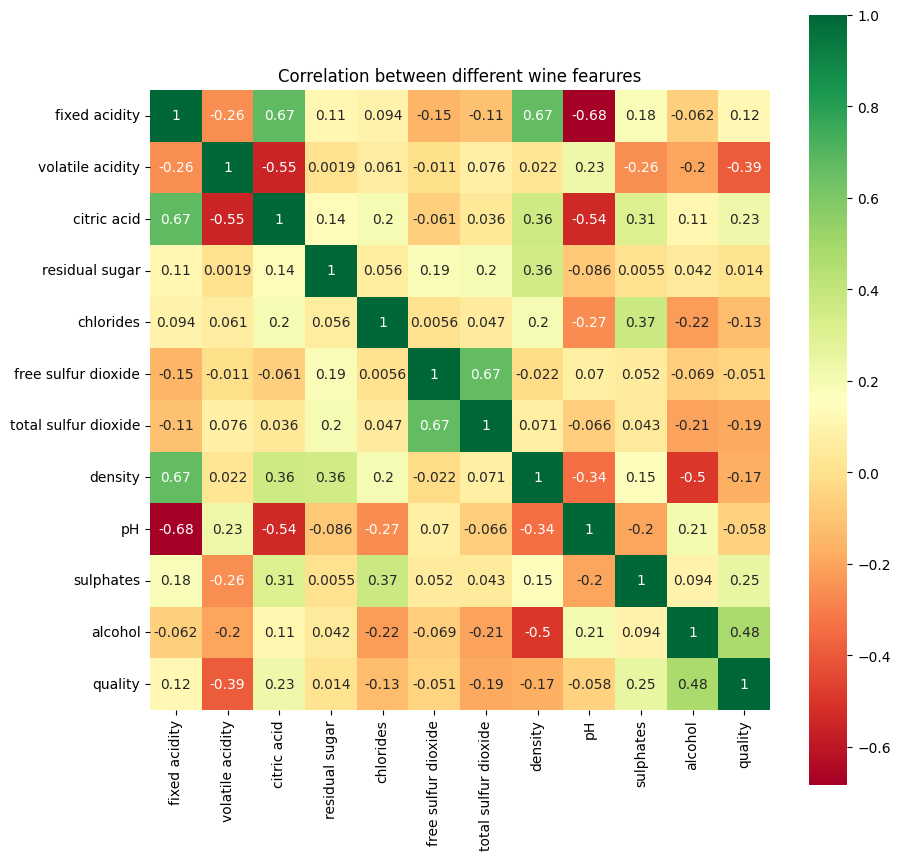

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Корреляция признаков'''
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='RdYlGn')
plt.title('Correlation between different wine fearures')



Выводы:
- Сильную корреляцию с целевым признаком имеют признаки: alcohol, volatile acidity, citric acid, sulphates
- Слабую корреляцию с целевым признаком имеют признаки: fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH

Text(0.5, 1.0, 'Count of quality ranks')

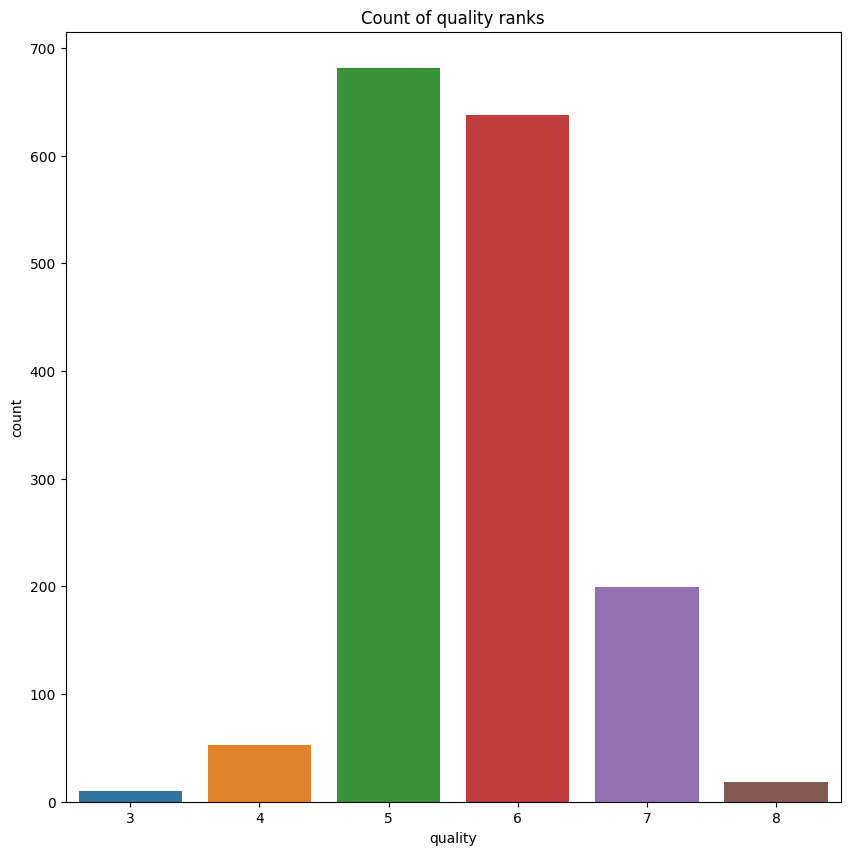

In [8]:
plt.figure(figsize=(10, 10))
sns.countplot(x='quality', data=data)
plt.title('Count of quality ranks')

- Больше всего вина с уровнем качества 5 и 6.

Text(0.5, 1.0, 'Alcohol content in wine with relation to quality')

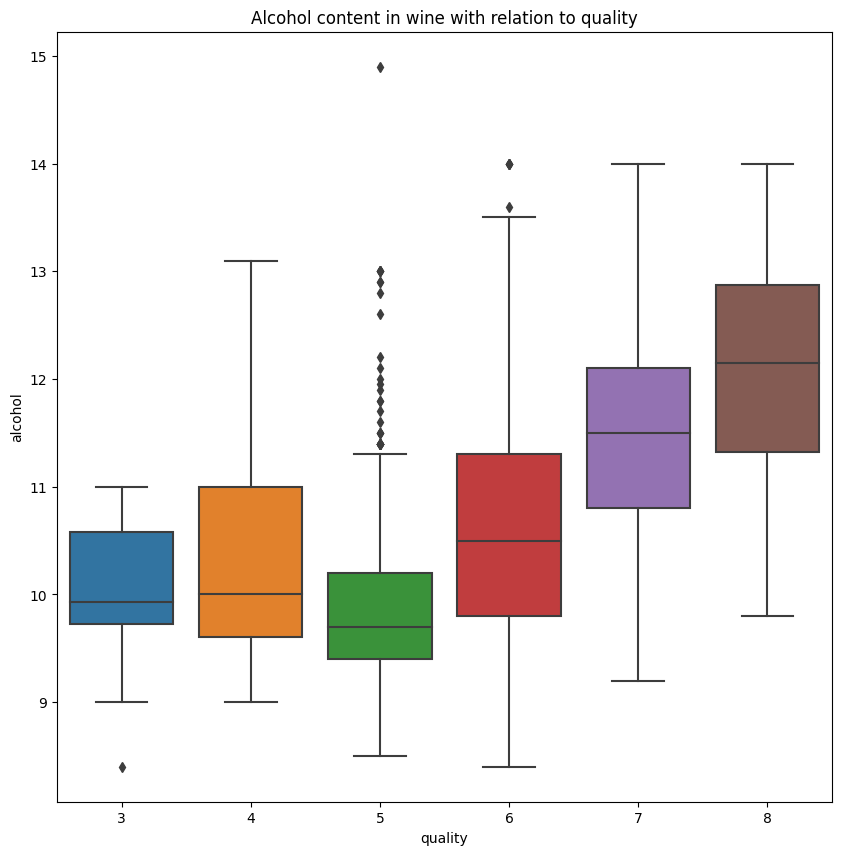

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol content in wine with relation to quality')

Выводы:
- Алкоголь в вине влияет на его качество: чем больше содержание алкоголя в вине, тем выше его качество. 
- Есть выбросы в данных, но они не сильно влияют на итоговый результат.

## №5 При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering)
Необходимости не возникло :)

##  Дополнительное задание. Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE)

In [32]:
'''RFE'''
from sklearn.feature_selection import RFE

X = data.drop(['quality'], axis=1)
y = data['quality']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=6)
fit = rfe.fit(X, y)

for (i, j) in zip(X.columns, fit.support_):
    if j != True:
        X = X.drop([i], axis=1)

list(X.columns.values)

['volatile acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

## №6 Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(['quality'], axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## №7 При обучении моделей использовать масштабирование данных

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## №8 Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R2. 

In [13]:
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])
w = gradient_descent(X_train_scaled, y_train)
y_pred = X_test_scaled.dot(w)

In [14]:
''' Display Mse, RMSE and R2 metrics'''
from sklearn.metrics import mean_squared_error, r2_score
my_gradient_descent_mse = mean_squared_error(y_test, y_pred)
my_gradient_descent_rmse = np.sqrt(my_gradient_descent_mse)
my_gradient_descent_r2 = r2_score(y_test, y_pred)
print('MSE: ', my_gradient_descent_mse)
print('RMSE: ', my_gradient_descent_rmse)
print('R2: ', my_gradient_descent_r2)


MSE:  0.38983888020776203
RMSE:  0.6243707874394525
R2:  0.4034653635996529


## №9 Обучить модель, используя существующую библиотеку. Например, в sklearn для -регуляризатора можно использовать Ridge. Сравнить качество с вашей реализацией.

In [15]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [16]:
''' Display Mse, RMSE and R2 metrics'''
Ridge_mse = mean_squared_error(y_test, y_pred)
Ridge_rmse = np.sqrt(Ridge_mse)
Ridge_r2 = r2_score(y_test, y_pred)

print('MSE: ', Ridge_mse)
print('RMSE: ', Ridge_rmse)
print('R2: ', Ridge_r2)


MSE:  0.39003800591460774
RMSE:  0.6245302281832383
R2:  0.4031606598177524


In [17]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'MSE', 'RMSE', 'R2']
table.add_row(['Ridge', Ridge_mse, Ridge_rmse, Ridge_r2])
table.add_row(['Gradient_descent', my_gradient_descent_mse, my_gradient_descent_rmse, my_gradient_descent_r2])

print(table)


+------------------+---------------------+--------------------+--------------------+
|      Model       |         MSE         |        RMSE        |         R2         |
+------------------+---------------------+--------------------+--------------------+
|      Ridge       | 0.39003800591460774 | 0.6245302281832383 | 0.4031606598177524 |
| Gradient_descent | 0.38983888020776203 | 0.6243707874394525 | 0.4034653635996529 |
+------------------+---------------------+--------------------+--------------------+


Выводы: самостоятельная и библиотечная реализации дают очень схожие результаты

## №10 Повторить тоже самое, но используя кросс-валидацию

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print('MSE: ', scores.mean())
print('RMSE: ', np.sqrt(-scores.mean()))
print('R2: ', r2_score(y_test, y_pred))

MSE:  -0.44000920910862507
RMSE:  0.6633318996615684
R2:  0.4031606598177524


## №11 Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

rdg_model = Ridge()
scoring = {'neg_mse': 'neg_mean_squared_error',
           'neg_rmse': 'neg_root_mean_squared_error',
           'r2': 'r2'}

kf = KFold(n_splits = 5, random_state=42, shuffle=True)
scores = cross_validate(rdg_model, X, y, cv = kf,
                                scoring=scoring,
                                return_train_score = True)

summary_table = pd.DataFrame(scores)

summary_table.drop(['fit_time', 'score_time'], axis = 1, inplace = True)
summary_table['test_mse'] = -1*summary_table['test_neg_mse']
summary_table['train_mse'] = -1*summary_table['train_neg_mse']
summary_table['test_rmse'] = -1*summary_table['test_neg_rmse']
summary_table['train_rmse'] = -1*summary_table['train_neg_rmse']
summary_table.drop(['test_neg_mse', 'train_neg_mse', 'test_neg_rmse', 'train_neg_rmse'], axis = 1, inplace = True)
summary_table = summary_table.transpose()
summary_table.set_axis(['Fold2','Fold3','Fold4','Fold5','Fold6'], axis=1, copy=False)
summary_table['E'] = summary_table.mean(axis = 1)
summary_table['STD'] = summary_table.std(axis = 1)

summary_table.style.format("{:.5f}")

,0,1,2,3,4,E,STD
test_r2,0.39871,0.27676,0.27995,0.33235,0.42750,0.34306,0.06119
train_r2,0.34694,0.37489,0.37841,0.36420,0.34137,0.36116,0.01476
test_mse,0.39295,0.46457,0.47871,0.45832,0.34734,0.42838,0.05012
train_mse,0.42487,0.40844,0.40308,0.40886,0.43666,0.41638,0.01249
test_rmse,0.62686,0.68159,0.69189,0.67699,0.58936,0.65334,0.03909
train_rmse,0.65182,0.63909,0.63489,0.63942,0.66080,0.64521,0.00964


Выводы:
- Модель с кросс-валидацией работает лучше, чем без нее
- Метрики качества модели на тестовой выборке ниже, чем на обучающей, что говорит о том, что модель не переобучена
- При увеличении количества фолдов качество модели улучшается






## Доп. задание 2. Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения

In [20]:
'''stochastic gradient descent'''
def stochastic_gradient_descent(X, y, w, eta=0.01, n_iterations=100):
    m = X.shape[0]
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2/m * xi.T.dot(xi.dot(w) - yi)
            w = w - eta * gradients
    return w

In [21]:
w = np.zeros(X_train_scaled.shape[1])
w = stochastic_gradient_descent(X_train_scaled, y_train, w)
y_pred = X_test_scaled.dot(w)

''' Display Mse, RMSE and R2 metrics'''
my_stochastic_gradient_descent_mse = mean_squared_error(y_test, y_pred)
my_stochastic_gradient_descent_rmse = np.sqrt(my_stochastic_gradient_descent_mse)
my_stochastic_gradient_descent_r2 = r2_score(y_test, y_pred)

print('MSE: ', my_stochastic_gradient_descent_mse)
print('RMSE: ', my_stochastic_gradient_descent_rmse)
print('R2: ', my_stochastic_gradient_descent_r2)

C:\Users\teemy\AppData\Local\Temp\ipykernel_3740\2568437260.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yi = y[random_index:random_index+1]


MSE:  1.0284085211337846
RMSE:  1.014104788044009
R2:  -0.5736791130187171


## Доп. задание 3. Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [22]:
def mini_batch_gradient_descent(X, y, batch_size=20, alpha=0.01, n_iterations=100):
    w = np.zeros(X.shape[1])
    m = X.shape[0]
    for i in range(n_iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            w = w - alpha * (1/batch_size) * np.dot(X_batch.T, (np.dot(X_batch, w) - y_batch))
    return w

In [23]:
w = mini_batch_gradient_descent(X_train_scaled, y_train)
y_pred = X_test_scaled.dot(w)

''' Display Mse, RMSE and R2 metrics'''
my_mini_batch_gradient_descent_mse = mean_squared_error(y_test, y_pred)
my_mini_batch_gradient_descent_rmse = np.sqrt(my_mini_batch_gradient_descent_mse)
my_mini_batch_gradient_descent_r2 = r2_score(y_test, y_pred)

print('MSE: ', my_mini_batch_gradient_descent_mse)
print('RMSE: ', my_mini_batch_gradient_descent_rmse)
print('R2: ', my_mini_batch_gradient_descent_r2)

C:\Users\teemy\AppData\Local\Temp\ipykernel_3740\2889762513.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = y[j:j+batch_size]


MSE:  0.3906455987191382
RMSE:  0.625016478758071
R2:  0.40223091634902275


### Свобдная таблица с результатами

In [24]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "MSE", "RMSE", "R2"]
x.add_row(["My Linear Regression", my_gradient_descent_mse, my_gradient_descent_rmse, my_gradient_descent_r2])
x.add_row(["Ridge Regression", Ridge_mse, Ridge_rmse, Ridge_r2])
x.add_row(["My Stochastic Gradient Descent", my_stochastic_gradient_descent_mse, my_stochastic_gradient_descent_rmse, my_stochastic_gradient_descent_r2])
x.add_row(["My Mini Batch Gradient Descent", my_mini_batch_gradient_descent_mse, my_mini_batch_gradient_descent_rmse, my_mini_batch_gradient_descent_r2])
print(x)

+--------------------------------+---------------------+--------------------+---------------------+
|             Model              |         MSE         |        RMSE        |          R2         |
+--------------------------------+---------------------+--------------------+---------------------+
|      My Linear Regression      | 0.38983888020776203 | 0.6243707874394525 |  0.4034653635996529 |
|        Ridge Regression        | 0.39003800591460774 | 0.6245302281832383 |  0.4031606598177524 |
| My Stochastic Gradient Descent |  1.0284085211337846 | 1.014104788044009  | -0.5736791130187171 |
| My Mini Batch Gradient Descent |  0.3906455987191382 | 0.625016478758071  | 0.40223091634902275 |
+--------------------------------+---------------------+--------------------+---------------------+
